In [ ]:
# Copyright 2022 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

In [2]:
#! pip install opencv-contrib-python
#! pip install tensorflow


In [2]:
# Import Tensorflow 2.0
#tensorflow_version 2.x
import tensorflow as tf 
import cv2

#! pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
# assert len(tf.config.list_physical_devices('GPU')) > 0

In [3]:
#mnist = tf.keras.datasets.mnist
#Training Fashion MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      # tf.keras.layers.Dense(128, activation= '''TODO'''),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) 
      # [TODO Dense layer to output classification probabilities]
      
  ])
  return fc_model

model = build_fc_model()

In [ ]:
'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

In [ ]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels) # TODO
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)

In [109]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        # TODO: Define the first max pooling layer
        #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')
        # TODO: Define the second convolutional layer
        #tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')
        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [TODO Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 24)        240       
                                                                 
 conv2d_51 (Conv2D)          (None, 24, 24, 128)       27776     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 18432)             0         
                                                                 
 dense_80 (Dense)            (None, 128)               2359424   
                                                                 
 dense_81 (Dense)            (None, 128)               16512     
                                                     

In [113]:
'''TODO: Define the batch size and the number of epochs to use during training'''
BATCH_SIZE = 64
EPOCHS = 10
learning_rate = 1e-3

In [114]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(
              optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

In [115]:
from datetime import datetime
start_time = datetime.now()
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = cnn_model.fit(train_images, train_labels, validation_split = 0.1, batch_size=BATCH_SIZE, epochs=EPOCHS,)# callbacks=[callback], verbose=0)
# cnn_model.fit('''TODO''')
end_time = datetime.now()
#round(cnn_model.optimizer.learning_rate.numpy(), 5)
history.history

9000/9000 [==============================] - 338s 37ms/step - loss: 0.3636 - accuracy: 0.8691 - val_loss: 0.2770 - val_accuracy: 0.8987


{'loss': [0.3635621964931488],
 'accuracy': [0.8691111207008362],
 'val_loss': [0.2769782841205597],
 'val_accuracy': [0.8986666798591614]}

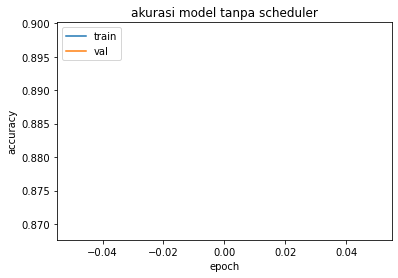

In [116]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi model tanpa scheduler')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [117]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)
print('Duration: {}'.format(end_time - start_time))

313/313 [==============================] - 9s 27ms/step - loss: 0.2935 - accuracy: 0.8953
Test accuracy: 0.8952999711036682
Duration: 0:05:38.443459


In [118]:
'''TODO: Define learning rate scheduller'''
initial_learning_rate = 1e-3
epochs = 10
powers = 1
decay = learning_rate/EPOCHS

In [ ]:
'''TODO: Defined polinomial decay'''
class lr_polynomial_decay:
	def __init__(self, epochs=epochs, learning_rate=initial_learning_rate, power=powers):
		# store the maximum number of epochs, base learning rate,
		# and power of the polynomial
		self.epochs = epochs
		self.learning_rate = learning_rate
		self.power = power
        
	def __call__(self, epoch):
		# compute the new learning rate based on polynomial decay
		decay = (1 - (epoch / float(self.epochs))) ** self.power
		updated_eta = self.initial_learning_rate * decay
		# return the new learning rate
		return float(updated_eta)

In [ ]:
def lr_time_based_decay(epochs, learning_rate):
        return (learning_rate * 1) / (1 + (decay * epochs))

def lr_exp_decay(epoch):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

In [ ]:
#curScheduler = lr_polynomial_decay(epochs=EPOCHS, learning_rate=initial_learning_rate, power=POWER)
#curScheduler = lr_time_based_decay(epochs=epochs, learning_rate=initial_learning_rate)

'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(
              optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#round(cnn_model.optimizer.lr.numpy(), 10)
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

In [ ]:
from datetime import datetime
start_time = datetime.now()
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
#callback = tf.keras.callbacks.LearningRateScheduler(curScheduler)
history_scheduler = cnn_model.fit(train_images, train_labels, validation_split = 0.1, batch_size=BATCH_SIZE, 
                                    epochs=EPOCHS)#, callbacks=[callback], verbose=1)
# cnn_model.fit('''TODO''')
end_time = datetime.now()
#round(cnn_model.optimizer.learning_rate.numpy(), 5)
history_scheduler.history

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history_scheduler.history['accuracy'])
plt.plot(history_scheduler.history['val_accuracy'])
plt.title('akurasi model dengan scheduler')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)
print('Duration: {}'.format(end_time - start_time))